**1.Install required library are as following:-**



*   Pandas

*   Prophet
* Matplotlib
* Numpy
* Scipy
* Ipython


In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn statsmodels tensorflow


In [ ]:
import pandas as pd

2.Upoad CSV file for PreProcessing

In [3]:
df=pd.read_csv("/content/Dataset.csv")
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
# Convert the 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as the index for time series analysis
df.set_index('Order Date', inplace=True)

# Aggregate the data by month to calculate the total revenue or profit per month
monthly_sales = df.resample('M').sum()['Total Revenue']

# Display the first few rows of the aggregated data
monthly_sales.head()


<ipython-input-6-96fb55b71ad8>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').sum()['Total Revenue']


,Total Revenue
Order Date,
2010-02-28,3410661.12
2010-03-31,0.00
2010-04-30,0.00
2010-05-31,2587973.26
2010-06-30,1082418.40


**3.Visualize the Graph Between Monthly Sale and Total revenue**

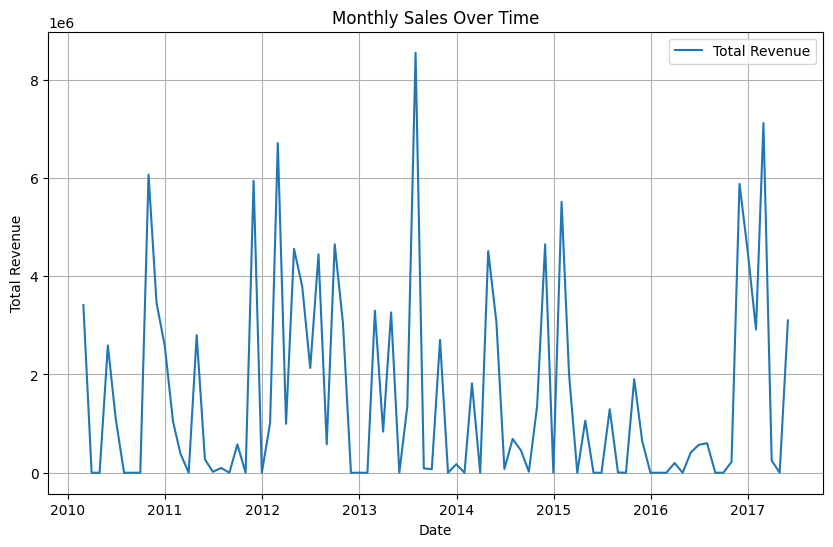

In [ ]:
import matplotlib.pyplot as plt

# Plot the monthly sales to visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Total Revenue')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.legend()
plt.show()


***4.Graph for Total Revenue ,Trend And Seasonal for visualization***

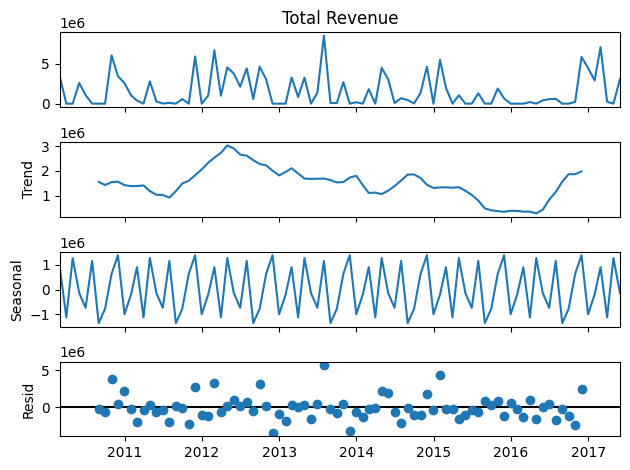

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Plot the decomposed components
decomposition.plot()
plt.show()


**4.Install this library for forecasting**

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.7 MB/s eta 0:00:00


5. Here we train the model and forecasting the prices
* Blue colour Actual Prediction
* Red  Prediction

<ipython-input-11-155ee337777e>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').sum()['Total Revenue']
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/d

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2242.841, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2266.618, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2259.503, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2262.685, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2245.781, Time=0.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2243.448, Time=0.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2242.198, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2247.576, Time=1.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=2242.945, Time=0.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2242.633, Time=0.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2241.762, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2245.647, Time=0.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=2243.710, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 5.623 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


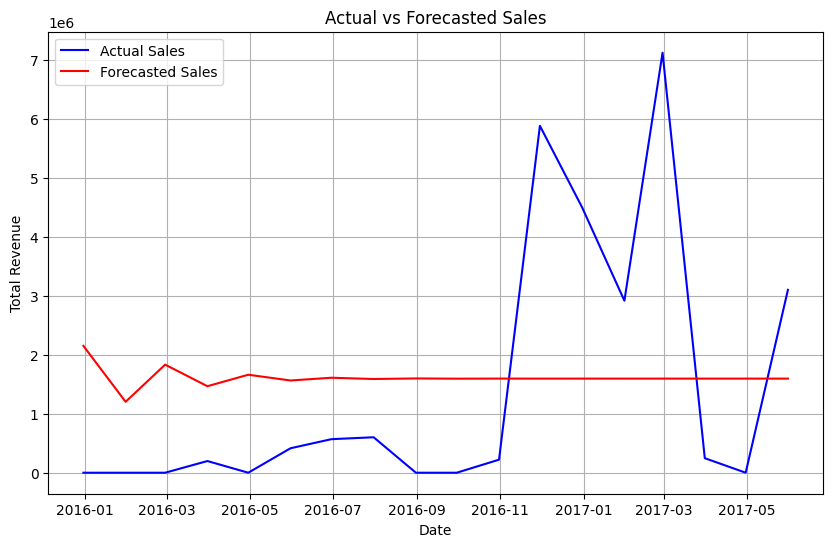

RMSE: 2232496.3474753527
Future Sales Prediction (next 12 months):
 2015-12-31    2.148962e+06
2016-01-31    1.201311e+06
2016-02-29    1.831132e+06
2016-03-31    1.465433e+06
2016-04-30    1.659969e+06
2016-05-31    1.562510e+06
2016-06-30    1.609109e+06
2016-07-31    1.587701e+06
2016-08-31    1.597177e+06
2016-09-30    1.593136e+06
2016-10-31    1.594791e+06
2016-11-30    1.594145e+06
Freq: ME, Name: predicted_mean, dtype: float64


In [ ]:
# Install necessary libraries (uncomment in Google Colab)
# !pip install pmdarima

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import numpy as np

# Load and preprocess the dataset
df = pd.read_csv('/content/Dataset.csv')  # Update with your dataset path
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Aggregate the data by month (for simplicity)
monthly_sales = df.resample('M').sum()['Total Revenue']

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

# Fit the ARIMA model using auto_arima to find the best parameters (p, d, q)
stepwise_model = auto_arima(train, seasonal=False, trace=True, suppress_warnings=True)
stepwise_model.summary()

# Fit ARIMA model based on auto_arima suggestions
arima_model = ARIMA(train, order=stepwise_model.order)
arima_result = arima_model.fit()

# Forecast future values (length of the test set)
forecast = arima_result.forecast(steps=len(test))

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Sales', color='blue')
plt.plot(test.index, forecast, label='Forecasted Sales', color='red')
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Forecast future sales for the next 12 months
future_forecast = arima_result.forecast(steps=12)
print("Future Sales Prediction (next 12 months):\n", future_forecast)


**5.Model Training LSTM the the graph look **

Total Revenue column found: float64


<ipython-input-12-9e7afc9870e7>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Total Revenue'].resample('M').sum()


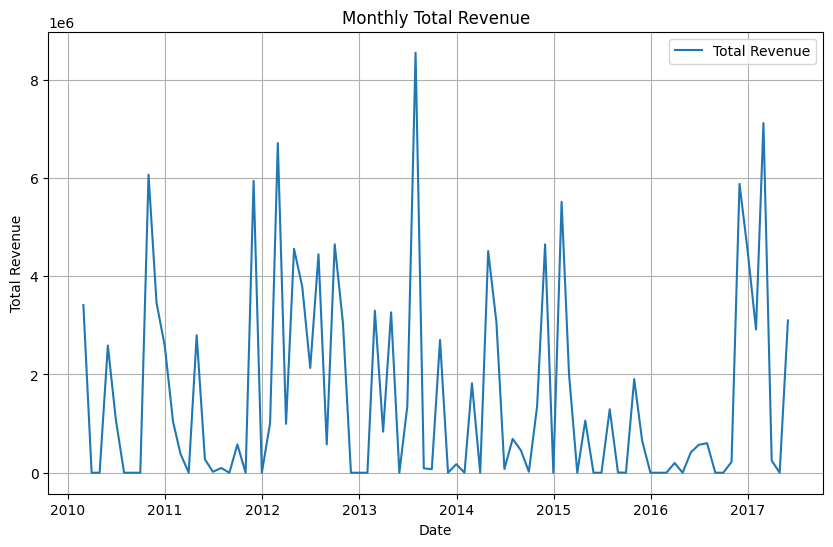

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - loss: 0.1025 - val_loss: 0.1684
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0624 - val_loss: 0.1338
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0808 - val_loss: 0.1126
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0736 - val_loss: 0.1164
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0620 - val_loss: 0.1261
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0584 - val_loss: 0.1252
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0679 - val_loss: 0.1220
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0629 - val_loss: 0.1209
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0510 - val_loss: 0.1200
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0635 - val_loss: 0.1189
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0527 - val_loss: 0.1217
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0621 - val_loss: 0.1182
Epoch 13/50

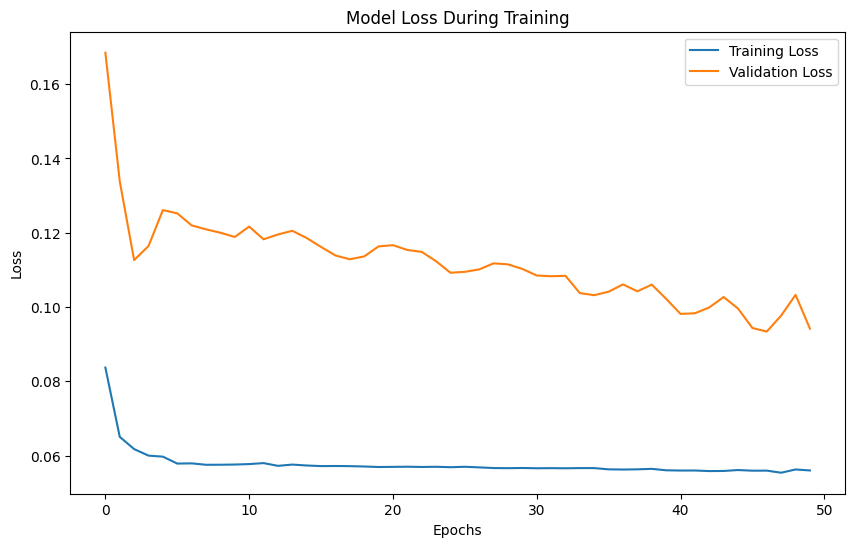

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


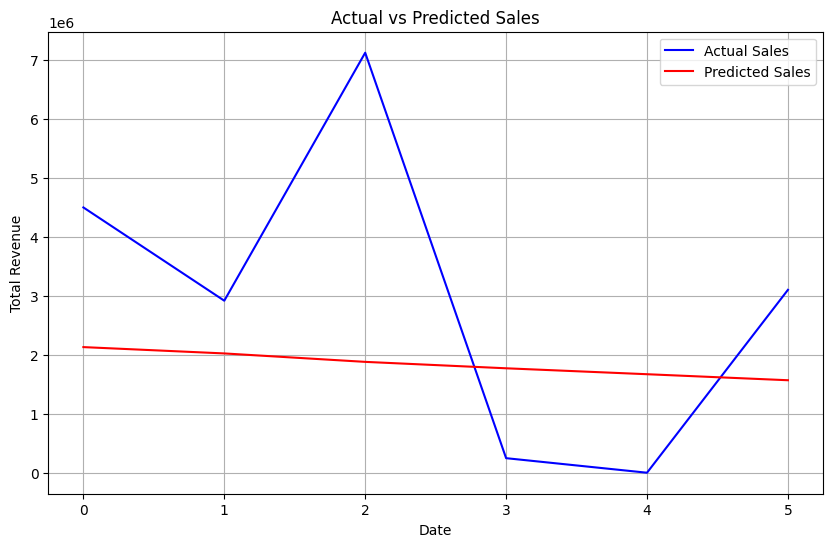

RMSE: 2622679.8075281633
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Future Sales Prediction (next 12 months):
 [[1504994.54077468]
 [1453121.48016099]
 [1405753.00270787]
 [1341571.06514574]
 [1287816.96700702]
 [1249128.35970395]
 [1234276.41476116]
 [1230171.16369363]
 [1225597.30863936]
 [1246149.79561323]
 [1169454.85822474]
 [1104584.53121904]
 [1127722.61709257]
 [1144605.22175725]
 [1162876.06573263]]


In [ ]:
# Install necessary libraries (uncomment if running in Google Colab)
# !pip install tensorflow
# !pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess the dataset
df = pd.read_csv('/content/Dataset.csv')  # Update with your dataset path

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as index
df.set_index('Order Date', inplace=True)

# Check if 'Total Revenue' exists and is numerical
if 'Total Revenue' in df.columns:
    print(f"Total Revenue column found: {df['Total Revenue'].dtype}")

    # Aggregate the data by month (resample and sum the revenue)
    monthly_sales = df['Total Revenue'].resample('M').sum()

    # Plot the sales data
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_sales, label='Total Revenue')
    plt.title('Monthly Total Revenue')
    plt.xlabel('Date')
    plt.ylabel('Total Revenue')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Scale the data (LSTM models perform better with scaled data)
    scaler = MinMaxScaler(feature_range=(0, 1))
    monthly_sales_scaled = scaler.fit_transform(monthly_sales.values.reshape(-1, 1))

    # Split the data into training and testing sets (80% train, 20% test)
    train_size = int(len(monthly_sales_scaled) * 0.8)
    train, test = monthly_sales_scaled[:train_size], monthly_sales_scaled[train_size:]

    # Function to create sequences for LSTM
    def create_sequences(data, seq_length):
        x, y = [], []
        for i in range(len(data) - seq_length):
            x.append(data[i:i+seq_length])
            y.append(data[i+seq_length])
        return np.array(x), np.array(y)

    seq_length = 12  # 12 months of data to predict the next month
    X_train, y_train = create_sequences(train, seq_length)
    X_test, y_test = create_sequences(test, seq_length)

    # Reshape the data for LSTM (samples, timesteps, features)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

    # Plot the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Make predictions on the test set
    predictions = model.predict(X_test)
    predictions_rescaled = scaler.inverse_transform(predictions)  # Rescale the predictions back to the original scale

    # Rescale the test set for comparison
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_rescaled, label='Actual Sales', color='blue')
    plt.plot(predictions_rescaled, label='Predicted Sales', color='red')
    plt.title('Actual vs Predicted Sales')
    plt.xlabel('Date')
    plt.ylabel('Total Revenue')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Evaluate the model
    mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
    rmse = np.sqrt(mse)
    print(f'RMSE: {rmse}')

    # Forecast future sales for the next 12 months
    last_seq = test[-seq_length:]  # Take the last sequence from the test data
    future_predictions = []
    for _ in range(15):
        last_seq = last_seq.reshape((1, seq_length, 1))
        next_pred = model.predict(last_seq)[0]
        future_predictions.append(next_pred)
        last_seq = np.append(last_seq[:, 1:, :], [[next_pred]], axis=1)

    # Rescale the future predictions back to the original scale
    future_predictions_rescaled = scaler.inverse_transform(future_predictions)

    print("Future Sales Prediction (next 12 months):\n", future_predictions_rescaled)

else:
    print("'Total Revenue' column not found or not numerical.")


**6.Trend,Resid,Seasonal And Total revenue graph**

Total Revenue column found: float64


<ipython-input-15-84795fa3fac3>:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Total Revenue'].resample('M').sum()


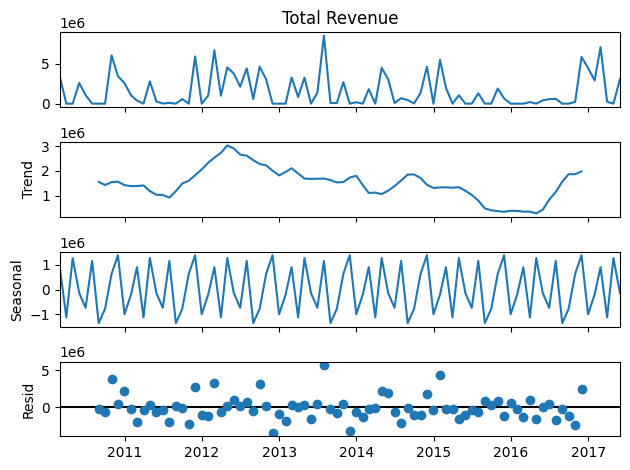

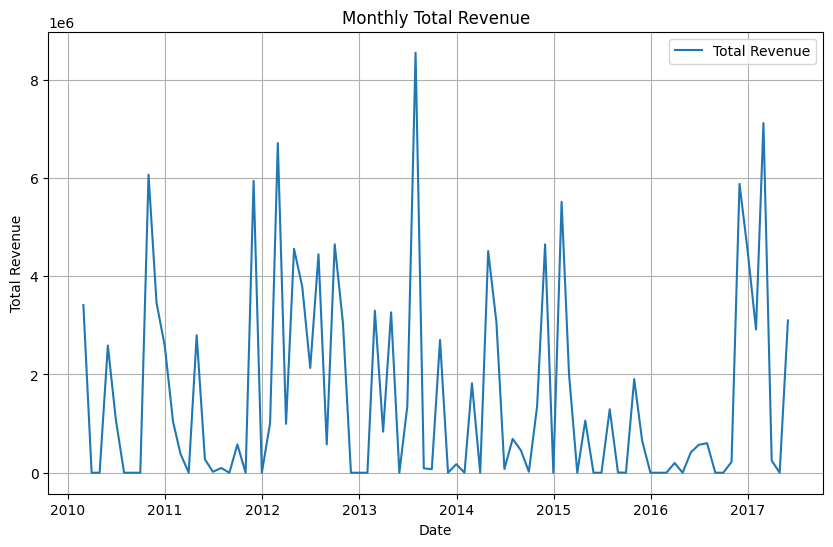

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 481ms/step - loss: 0.1014 - val_loss: 0.1833
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0855 - val_loss: 0.1676
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0678 - val_loss: 0.1502
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0603 - val_loss: 0.1309
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0551 - val_loss: 0.1136
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0550 - val_loss: 0.1074
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0614 - val_loss: 0.1080
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0545 - val_loss: 0.1132
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0610 - val_loss: 0.1178
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0518 - val_loss: 0.1223
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0527 - val_loss: 0.1246
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0610 - val_l

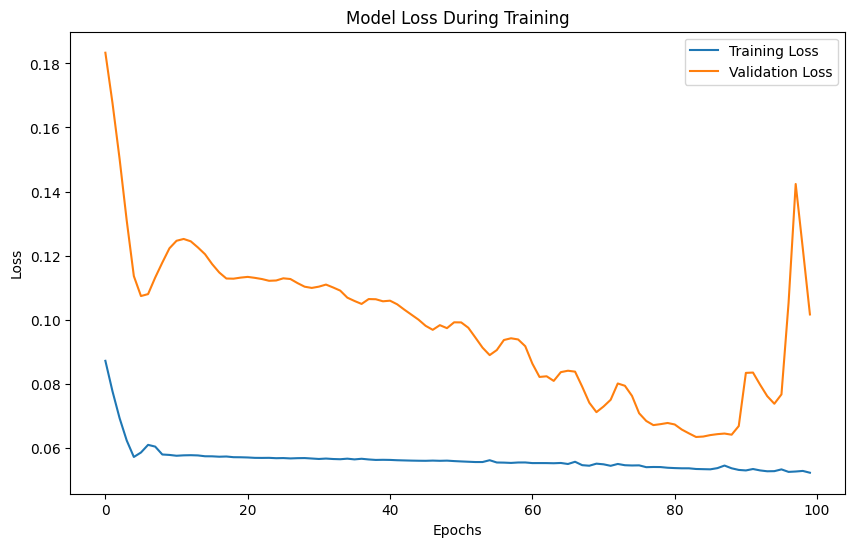

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


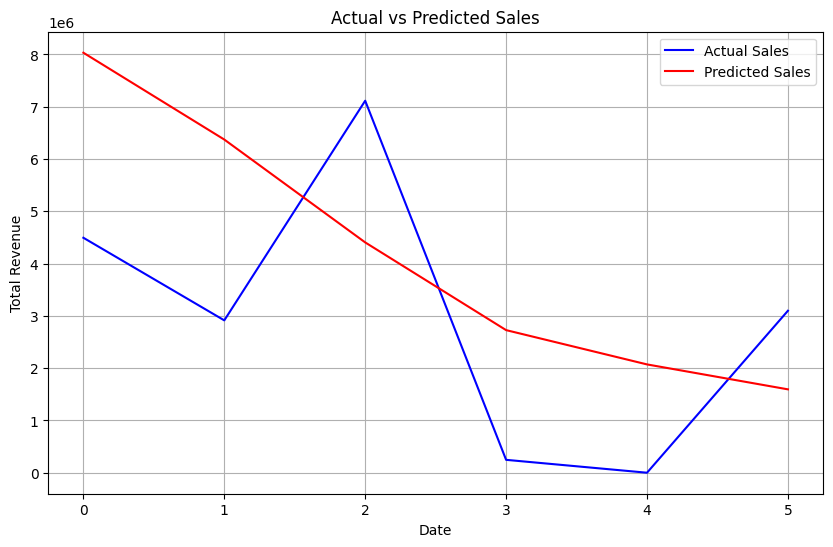

RMSE: 2724468.2152364394
MAE: 2627216.16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


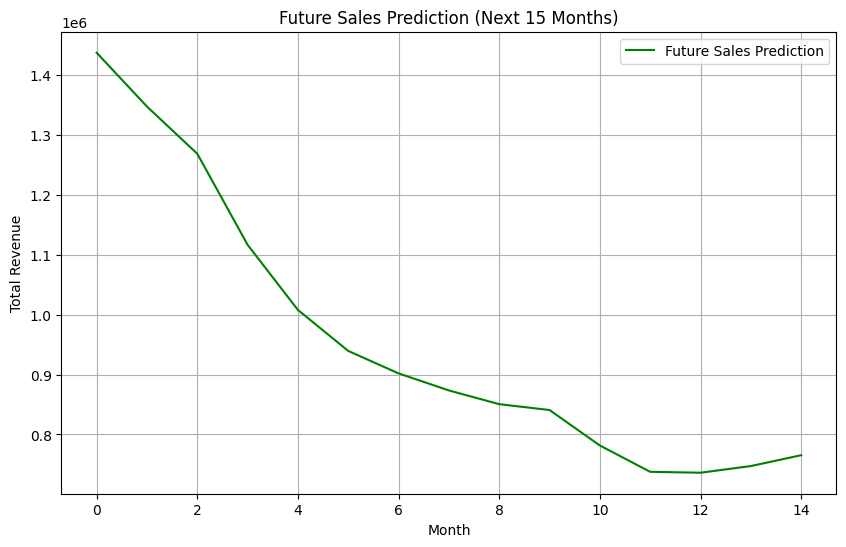

In [ ]:
# Install necessary libraries (uncomment if running in Google Colab)
# !pip install tensorflow
# !pip install scikit-learn
# !pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess the dataset
df = pd.read_csv('/content/Dataset.csv')  # Update with your dataset path

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as index
df.set_index('Order Date', inplace=True)

# Check if 'Total Revenue' exists and is numerical
if 'Total Revenue' in df.columns:
    print(f"Total Revenue column found: {df['Total Revenue'].dtype}")

    # Aggregate the data by month (resample and sum the revenue)
    monthly_sales = df['Total Revenue'].resample('M').sum()

    # Perform seasonal decomposition to understand trend and seasonality
    decomposition = seasonal_decompose(monthly_sales, model='additive')
    decomposition.plot()
    plt.show()

    # Plot the sales data
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_sales, label='Total Revenue')
    plt.title('Monthly Total Revenue')
    plt.xlabel('Date')
    plt.ylabel('Total Revenue')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Scale the data (LSTM models perform better with scaled data)
    scaler = MinMaxScaler(feature_range=(0, 1))
    monthly_sales_scaled = scaler.fit_transform(monthly_sales.values.reshape(-1, 1))

    # Split the data into training and testing sets (80% train, 20% test)
    train_size = int(len(monthly_sales_scaled) * 0.8)
    train, test = monthly_sales_scaled[:train_size], monthly_sales_scaled[train_size:]

    # Function to create sequences for LSTM
    def create_sequences(data, seq_length):
        x, y = [], []
        for i in range(len(data) - seq_length):
            x.append(data[i:i+seq_length])
            y.append(data[i+seq_length])
        return np.array(x), np.array(y)

    seq_length = 12  # 12 months of data to predict the next month
    X_train, y_train = create_sequences(train, seq_length)
    X_test, y_test = create_sequences(test, seq_length)

    # Reshape the data for LSTM (samples, timesteps, features)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build the LSTM model with more layers
    model = Sequential()
    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
    model.add(LSTM(64, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

    # Plot the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Make predictions on the test set
    predictions = model.predict(X_test)
    predictions_rescaled = scaler.inverse_transform(predictions)  # Rescale the predictions back to the original scale

    # Rescale the test set for comparison
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_rescaled, label='Actual Sales', color='blue')
    plt.plot(predictions_rescaled, label='Predicted Sales', color='red')
    plt.title('Actual vs Predicted Sales')
    plt.xlabel('Date')
    plt.ylabel('Total Revenue')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Evaluate the model with multiple metrics
    mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

    # Forecast future sales for the next 15 months (extended horizon)
    last_seq = test[-seq_length:]  # Take the last sequence from the test data
    future_predictions = []
    for _ in range(15):
        last_seq = last_seq.reshape((1, seq_length, 1))
        next_pred = model.predict(last_seq)[0]
        future_predictions.append(next_pred)
        last_seq = np.append(last_seq[:, 1:, :], [[next_pred]], axis=1)

    # Rescale the future predictions back to the original scale
    future_predictions_rescaled = scaler.inverse_transform(future_predictions)

    # Plot future sales predictions
    plt.figure(figsize=(10, 6))
    plt.plot(future_predictions_rescaled, label='Future Sales Prediction', color='green')
    plt.title('Future Sales Prediction (Next 15 Months)')
    plt.xlabel('Month')
    plt.ylabel('Total Revenue')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("'Total Revenue' column not found or not numerical.")


**7.Our Model predict the cost of price for 12 months in lower value as well as High value**

<ipython-input-16-e7339bfb984c>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_prophet = df['Total Revenue'].resample('M').sum().reset_index()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps47nuiqq/toqs9ojx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps47nuiqq/2jp7jqny.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55067', 'data', 'file=/tmp/tmps47nuiqq/toqs9ojx.json', 'init=/tmp/tmps47nuiqq/2jp7jqny.json', 'output', 'file=/tmp/tmps47nuiqq/prophet_modellfcgnwfe/prophet_model-20250129151126.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:11:26 - cmdstanpy - INFO - C

<Figure size 1000x600 with 0 Axes>

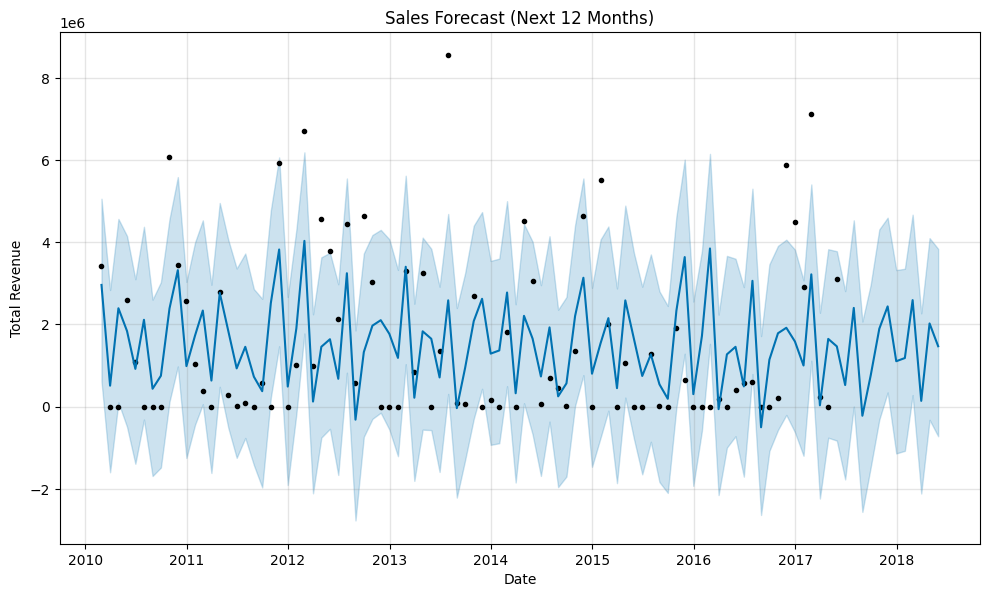

<Figure size 1000x600 with 0 Axes>

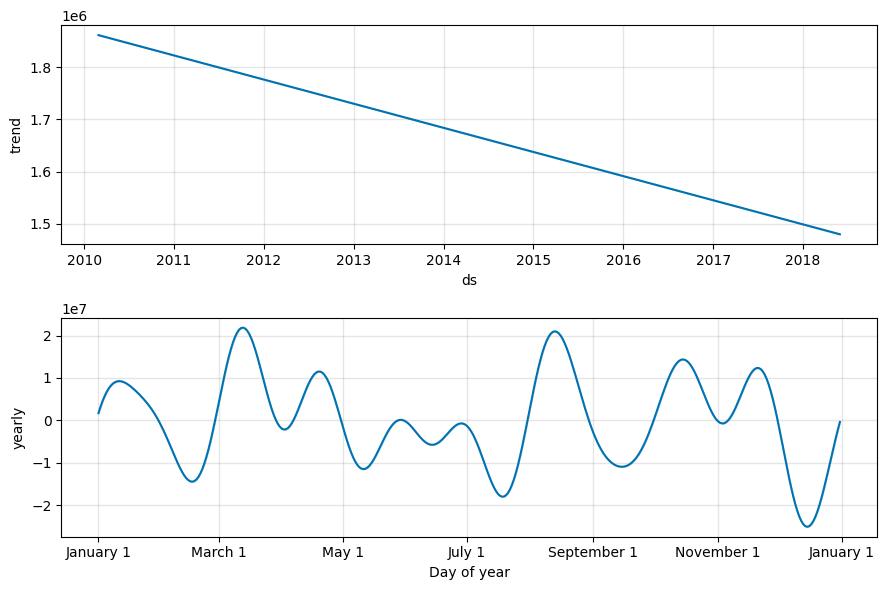

Future Sales Prediction (Next 12 Months):
           ds          yhat    yhat_lower    yhat_upper
88 2017-06-30  5.267596e+05 -1.770209e+06  2.811502e+06
89 2017-07-31  2.402770e+06  2.350952e+03  4.533431e+06
90 2017-08-31 -2.202586e+05 -2.561121e+06  2.071139e+06
91 2017-09-30  7.608245e+05 -1.473981e+06  2.967451e+06
92 2017-10-31  1.897163e+06 -3.137721e+05  4.312438e+06
93 2017-11-30  2.439786e+06  3.460428e+05  4.597654e+06
94 2017-12-31  1.105672e+06 -1.137901e+06  3.323529e+06
95 2018-01-31  1.183170e+06 -1.073995e+06  3.355101e+06
96 2018-02-28  2.592581e+06  2.819429e+05  4.670732e+06
97 2018-03-31  1.414454e+05 -2.112681e+06  2.270324e+06
98 2018-04-30  2.025145e+06 -3.200944e+05  4.100647e+06
99 2018-05-31  1.470298e+06 -7.199842e+05  3.839449e+06


In [ ]:
# Install necessary libraries (uncomment in Google Colab)
# !pip install prophet

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your dataset (ensure the correct path)
df = pd.read_csv('/content/Dataset.csv')  # Update with your dataset path

# Convert 'Order Date' to datetime and set as index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Ensure 'Total Revenue' exists and handle missing values
if 'Total Revenue' in df.columns:
    df['Total Revenue'] = df['Total Revenue'].fillna(0)  # Handle missing values

    # Prepare the data for Prophet (it requires a specific column format)
    df_prophet = df['Total Revenue'].resample('M').sum().reset_index()
    df_prophet.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for the target

    # Initialize Prophet model and add yearly seasonality (if appropriate)
    prophet_model = Prophet(yearly_seasonality=True)

    # Fit the model
    prophet_model.fit(df_prophet)

    # Make future dataframe for predictions (forecast for the next 12 months)
    future = prophet_model.make_future_dataframe(periods=12, freq='M')

    # Predict future values
    forecast = prophet_model.predict(future)

    # Plot the forecasted data
    plt.figure(figsize=(10, 6))
    prophet_model.plot(forecast)
    plt.title('Sales Forecast (Next 12 Months)')
    plt.xlabel('Date')
    plt.ylabel('Total Revenue')
    plt.grid(True)
    plt.show()

    # Optional: Plot components to understand the trends and seasonality
    plt.figure(figsize=(10, 6))
    prophet_model.plot_components(forecast)
    plt.show()

    # Show the forecast for the next 12 months
    future_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)
    print("Future Sales Prediction (Next 12 Months):")
    print(future_forecast)

else:
    print("'Total Revenue' column not found or not numerical.")


<ipython-input-17-a1b6d2c15a8a>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_prophet = df['Total Revenue'].resample('M').sum().reset_index()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps47nuiqq/v4tcuaee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps47nuiqq/fjmlwend.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59096', 'data', 'file=/tmp/tmps47nuiqq/v4tcuaee.json', 'init=/tmp/tmps47nuiqq/fjmlwend.json', 'output', 'file=/tmp/tmps47nuiqq/prophet_modelggtpz82k/prophet_model-20250129151401.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:14:01 - cmdstanpy - INFO - C

<Figure size 1000x600 with 0 Axes>

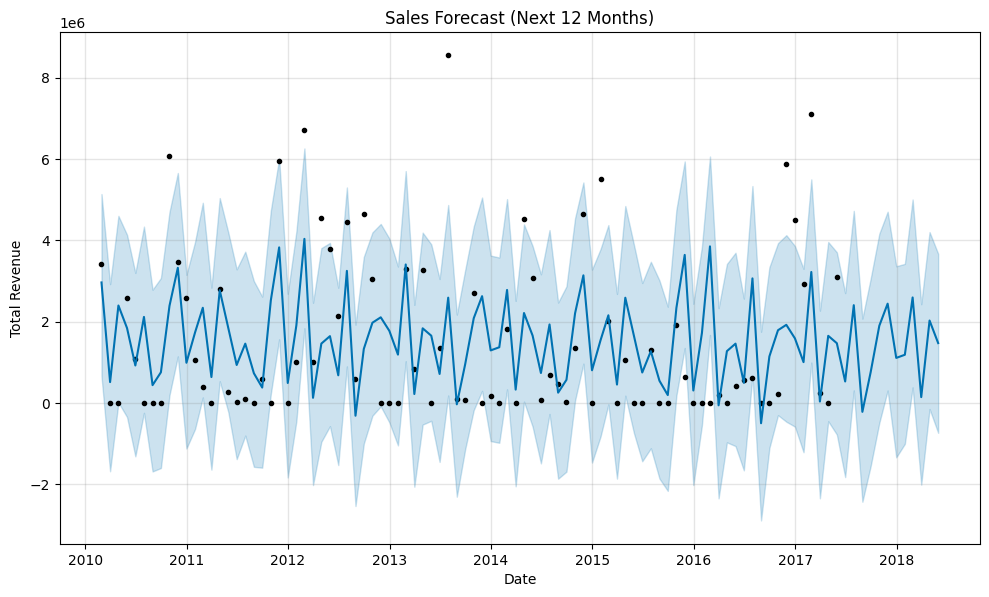

<Figure size 1000x600 with 0 Axes>

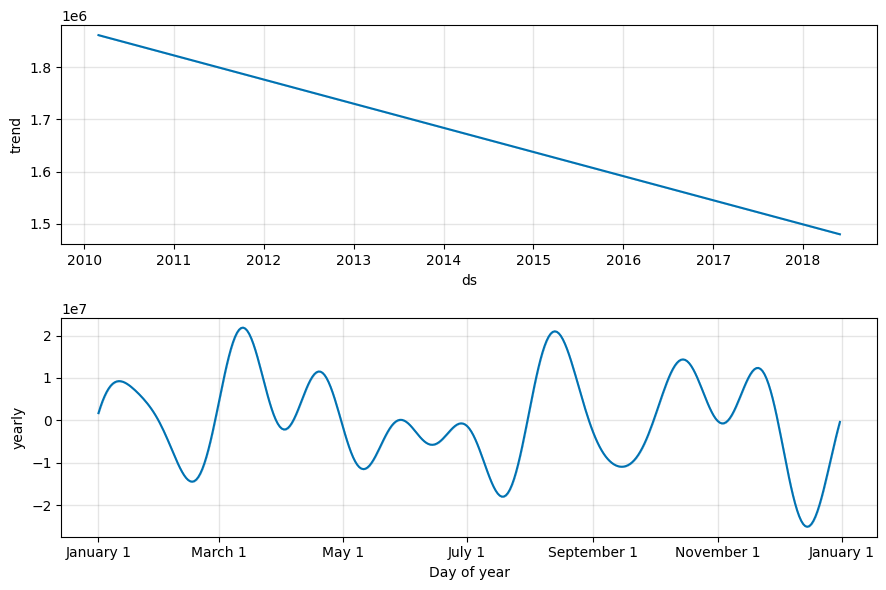

Future Sales Prediction (Next 12 Months):
           ds          yhat    yhat_lower    yhat_upper
88 2017-06-30  5.267596e+05 -1.826062e+06  2.699643e+06
89 2017-07-31  2.402770e+06  3.069184e+05  4.722503e+06
90 2017-08-31 -2.202586e+05 -2.432311e+06  2.072069e+06
91 2017-09-30  7.608245e+05 -1.548874e+06  3.058738e+06
92 2017-10-31  1.897163e+06 -4.907476e+05  4.160338e+06
93 2017-11-30  2.439786e+06  3.041318e+05  4.701399e+06
94 2017-12-31  1.105672e+06 -1.339926e+06  3.359833e+06
95 2018-01-31  1.183170e+06 -1.007587e+06  3.418812e+06
96 2018-02-28  2.592581e+06  3.811326e+05  5.001887e+06
97 2018-03-31  1.414454e+05 -2.010543e+06  2.426501e+06
98 2018-04-30  2.025145e+06 -1.512385e+05  4.200691e+06
99 2018-05-31  1.470298e+06 -7.370548e+05  3.667629e+06


In [ ]:
# Install necessary libraries (uncomment in Google Colab)
# !pip install prophet

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from IPython.display import HTML
import base64

# Load your dataset (ensure the correct path)
df = pd.read_csv('/content/Dataset.csv')  # Update with your dataset path

# Convert 'Order Date' to datetime and set as index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Ensure 'Total Revenue' exists and handle missing values
if 'Total Revenue' in df.columns:
    df['Total Revenue'] = df['Total Revenue'].fillna(0)  # Handle missing values

    # Prepare the data for Prophet (it requires a specific column format)
    df_prophet = df['Total Revenue'].resample('M').sum().reset_index()
    df_prophet.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for the target

    # Initialize Prophet model and add yearly seasonality (if appropriate)
    prophet_model = Prophet(yearly_seasonality=True)

    # Fit the model
    prophet_model.fit(df_prophet)

    # Make future dataframe for predictions (forecast for the next 12 months)
    future = prophet_model.make_future_dataframe(periods=12, freq='M')

    # Predict future values
    forecast = prophet_model.predict(future)

    # Plot the forecasted data
    plt.figure(figsize=(10, 6))
    prophet_model.plot(forecast)
    plt.title('Sales Forecast (Next 12 Months)')
    plt.xlabel('Date')
    plt.ylabel('Total Revenue')
    plt.grid(True)
    plt.show()

    # Optional: Plot components to understand the trends and seasonality
    plt.figure(figsize=(10, 6))
    prophet_model.plot_components(forecast)
    plt.show()

    # Show the forecast for the next 12 months
    future_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)
    print("Future Sales Prediction (Next 12 Months):")
    print(future_forecast)

    # Save the forecast to a CSV file
    future_forecast.to_csv('sales_forecast.csv', index=False)

    # Create a download button
    def create_download_link(df, title="Download CSV file", filename="data.csv"):
        csv = df.to_csv(index=False)
        b64 = base64.b64encode(csv.encode()).decode()  # Convert to base64
        href = f'<a href="data:file/csv;base64,{b64}" download="{filename}">{title}</a>'
        return HTML(href)

    # Display the download link
    create_download_link(future_forecast, title="Click here to download the forecasted data", filename="sales_forecast.csv")

else:
    print("'Total Revenue' column not found or not numerical.")


In [ ]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 4.4 MB/s eta 0:00:00


**8.For plot the graph of Total revenue using Matplot3D**

<ipython-input-2-a78fc7d38b6e>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M', on='Order Date').sum()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7b6ars9/y43bxhya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7b6ars9/xizu9vsl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91349', 'data', 'file=/tmp/tmpp7b6ars9/y43bxhya.json', 'init=/tmp/tmpp7b6ars9/xizu9vsl.json', 'output', 'file=/tmp/tmpp7b6ars9/prophet_modelgub070b0/prophet_model-20250202093351.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:33:51 - cmdstanpy - INFO - Chain [1] start 

<Figure size 1000x600 with 0 Axes>

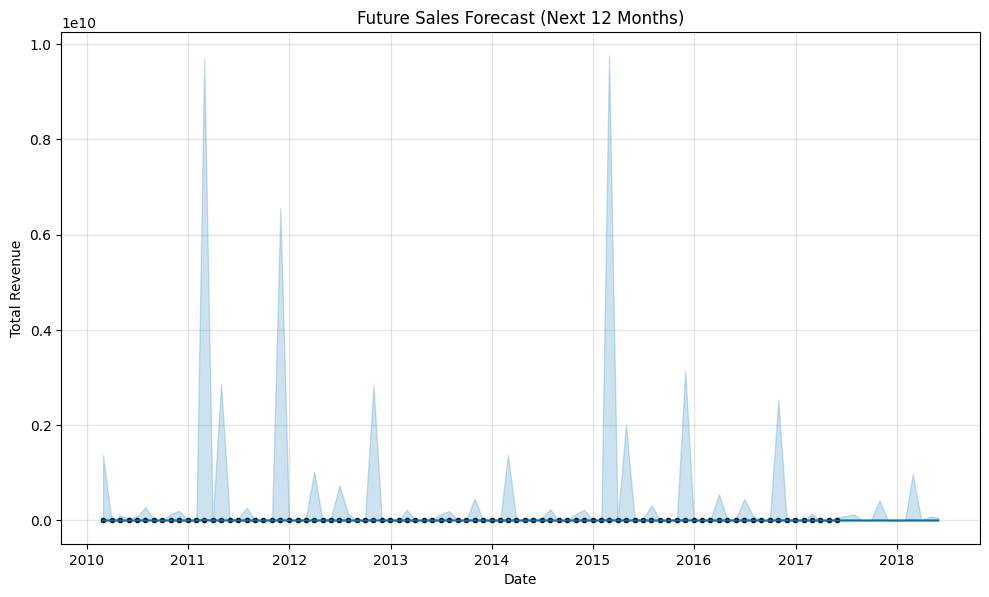

<ipython-input-2-a78fc7d38b6e>:92: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X, Y, Z, c=colors, cmap='plasma', s=60)


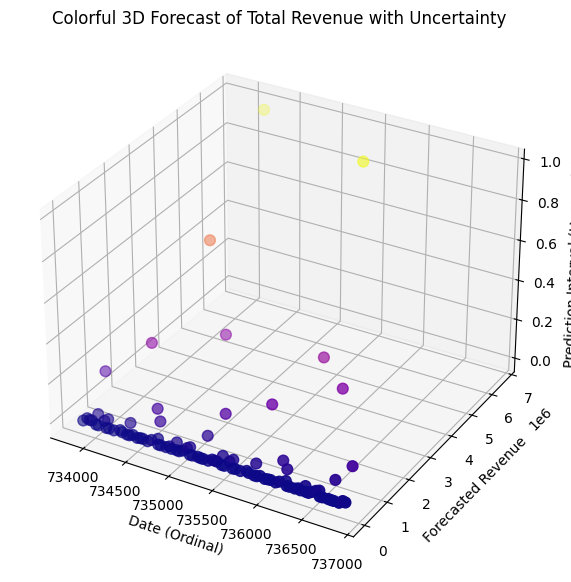

In [2]:
# Required Libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from IPython.display import HTML
import base64
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
import matplotlib.cm as cm  # For colormap

# Load the dataset
df = pd.read_csv('/content/Dataset.csv')

# Step 1: Data Preprocessing
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Ensure 'Total Revenue' exists and handle missing values if any
if 'Total Revenue' in df.columns:
    df['Total Revenue'] = df['Total Revenue'].fillna(0)  # Handle missing values

    # Remove Outliers in 'Total Revenue' using Z-score method
    z_scores = np.abs(stats.zscore(df['Total Revenue']))
    df = df[(z_scores < 3)]  # Remove rows where z-score is greater than 3 (outliers)

    # Aggregate data by month for Prophet model
    df_monthly = df.resample('M', on='Order Date').sum()

    # Apply Log Transformation to 'Total Revenue'
    df_monthly['Total Revenue'] = np.log1p(df_monthly['Total Revenue'])

    # Prepare data for Prophet model ('ds' for date and 'y' for target)
    df_prophet = df_monthly.reset_index()[['Order Date', 'Total Revenue']]
    df_prophet.columns = ['ds', 'y']

    # Initialize Prophet model with yearly seasonality
    prophet_model = Prophet(yearly_seasonality=True)

    # Fit the model
    prophet_model.fit(df_prophet)

    # Make future predictions for the next 12 months
    future = prophet_model.make_future_dataframe(periods=12, freq='M')
    forecast = prophet_model.predict(future)

    # Inverse the log transformation to revert back to original scale
    forecast['yhat'] = np.expm1(forecast['yhat'])
    forecast['yhat_lower'] = np.expm1(forecast['yhat_lower'])
    forecast['yhat_upper'] = np.expm1(forecast['yhat_upper'])

    # Step 3: Download predicted values as CSV
    def download_link(df, title="Download CSV file", filename="predictions.csv"):
        csv = df.to_csv(index=False)
        b64 = base64.b64encode(csv.encode()).decode()
        href = f'<a href="data:file/csv;base64,{b64}" download="{filename}">{title}</a>'
        return HTML(href)

    # Extract relevant columns
    future_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

    # Provide the download link for the predicted values
    display(download_link(future_forecast))

    # Step 4: Plot the forecast
    plt.figure(figsize=(10, 6))
    prophet_model.plot(forecast)
    plt.title('Future Sales Forecast (Next 12 Months)')
    plt.xlabel('Date')
    plt.ylabel('Total Revenue')
    plt.grid(True)
    plt.show()

    # Step 5: Plot 3D graph of forecasted values with colors
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Convert dates to numbers for 3D plotting
    date_nums = pd.to_datetime(forecast['ds']).map(pd.Timestamp.toordinal)

    # Set 3D axes data
    X = date_nums
    Y = forecast['yhat']
    Z = forecast['yhat_upper'] - forecast['yhat_lower']  # Uncertainty range

    # Normalize Z for colormap scaling
    norm = plt.Normalize(Z.min(), Z.max())

    # Use a colormap (e.g., 'plasma')
    colors = cm.plasma(norm(Z))

    # 3D Scatter plot with color mapping based on Z values (uncertainty)
    ax.scatter(X, Y, Z, c=colors, cmap='plasma', s=60)

    # Set axis labels
    ax.set_xlabel('Date (Ordinal)')
    ax.set_ylabel('Forecasted Revenue')
    ax.set_zlabel('Prediction Interval (Uncertainty)')

    # Set title
    ax.set_title('Colorful 3D Forecast of Total Revenue with Uncertainty')

    # Show the plot
    plt.show()

else:
    print("'Total Revenue' column not found or not numerical.")


9.Adding some extra features to visualize the graph using

* Bolinger Band
* Rolling Means
* Moving Average
* Lower scale
* Higher Scale


10. Add Downloadable button to download Prediction data in this format

* CSV
* Json
* XLSX

In [ ]:
# Required Libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from IPython.display import HTML
import base64
import io
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv('/content/Dataset.csv')

# Step 1: Data Preprocessing
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Ensure 'Total Revenue' exists and handle missing values if any
if 'Total Revenue' in df.columns:
    df['Total Revenue'] = df['Total Revenue'].fillna(0)  # Handle missing values

    # Remove Outliers in 'Total Revenue' using Z-score method
    z_scores = np.abs(stats.zscore(df['Total Revenue']))
    df = df[(z_scores < 3)]  # Remove rows where z-score is greater than 3 (outliers)

    # Aggregate data by month for Prophet model
    df_monthly = df.resample('M', on='Order Date').sum()

    # Apply Log Transformation to 'Total Revenue' to handle skewness and prevent negative values
    df_monthly['Total Revenue'] = np.log1p(df_monthly['Total Revenue'])

    # Prepare data for Prophet model ('ds' for date and 'y' for target)
    df_prophet = df_monthly.reset_index()[['Order Date', 'Total Revenue']]
    df_prophet.columns = ['ds', 'y']

    # Initialize Prophet model with yearly seasonality
    prophet_model = Prophet(yearly_seasonality=True)

    # Fit the model
    prophet_model.fit(df_prophet)

    # Make future predictions for the next 12 months
    future = prophet_model.make_future_dataframe(periods=12, freq='M')
    forecast = prophet_model.predict(future)

    # Inverse the log transformation to revert back to original scale
    forecast['yhat'] = np.expm1(forecast['yhat'])
    forecast['yhat_lower'] = np.expm1(forecast['yhat_lower'])
    forecast['yhat_upper'] = np.expm1(forecast['yhat_upper'])

    # Extract relevant columns (ds: date, yhat: predicted, yhat_lower and yhat_upper: uncertainty intervals)
    future_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

    # Step 2: Function to create download link for CSV, JSON, and XLSX formats
    def download_link(df, title="Download file", filename="predictions.csv", file_format="csv"):
        if file_format == 'csv':
            csv = df.to_csv(index=False)
            b64 = base64.b64encode(csv.encode()).decode()  # Encode to base64
            href = f'<a href="data:file/csv;base64,{b64}" download="{filename}">{title} (CSV)</a>'
        elif file_format == 'json':
            json_data = df.to_json(orient='records')
            b64 = base64.b64encode(json_data.encode()).decode()  # Encode to base64
            href = f'<a href="data:application/json;base64,{b64}" download="{filename}">{title} (JSON)</a>'
        elif file_format == 'xlsx':
            towrite = io.BytesIO()
            df.to_excel(towrite, index=False, engine='xlsxwriter')  # Write to Excel file in memory
            towrite.seek(0)
            b64 = base64.b64encode(towrite.read()).decode()  # Encode to base64
            href = f'<a href="data:application/vnd.openxmlformats-officedocument.spreadsheetml.sheet;base64,{b64}" download="{filename}">{title} (XLSX)</a>'
        return HTML(href)

    # Provide download links for CSV, JSON, and XLSX
    display(download_link(future_forecast, filename="predictions.csv", file_format="csv"))
    display(download_link(future_forecast, filename="predictions.json", file_format="json"))
    display(download_link(future_forecast, filename="predictions.xlsx", file_format="xlsx"))

    # Step 3: Plot Candlestick chart with Bollinger Bands

    # Add Bollinger Bands
    window = 3  # Choose window size (e.g., 3 months for a smoother view)
    forecast['rolling_mean'] = forecast['yhat'].rolling(window=window).mean()
    forecast['rolling_std'] = forecast['yhat'].rolling(window=window).std()

    # Calculate upper and lower Bollinger Bands
    forecast['Bollinger_upper'] = forecast['rolling_mean'] + (forecast['rolling_std'] * 2)
    forecast['Bollinger_lower'] = forecast['rolling_mean'] - (forecast['rolling_std'] * 2)

    # Step 4: Plot Candlestick chart using Plotly

    fig = go.Figure(data=[go.Candlestick(x=forecast['ds'],
                                         open=forecast['yhat_lower'],
                                         high=forecast['yhat_upper'],
                                         low=forecast['yhat_lower'],
                                         close=forecast['yhat'],
                                         name='Candlestick')])

    # Add Bollinger Bands to the plot
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['Bollinger_upper'],
                             line=dict(color='blue', width=1), name='Upper Band'))
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['Bollinger_lower'],
                             line=dict(color='red', width=1), name='Lower Band'))
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['rolling_mean'],
                             line=dict(color='green', width=2), name='Moving Average'))

    # Update layout
    fig.update_layout(title='Candlestick Chart with Bollinger Bands',
                      xaxis_title='Date',
                      yaxis_title='Predicted Total Revenue',
                      template='plotly_dark')

    # Show the plot
    fig.show()

    # Step 5: Display future forecast data
    print("Future Sales Prediction (Next 12 Months):")
    print(future_forecast)

else:
    print("'Total Revenue' column not found or not numerical.")


<ipython-input-23-3fb580605aa8>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M', on='Order Date').sum()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps47nuiqq/qervqxa_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps47nuiqq/mfj0jvue.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61887', 'data', 'file=/tmp/tmps47nuiqq/qervqxa_.json', 'init=/tmp/tmps47nuiqq/mfj0jvue.json', 'output', 'file=/tmp/tmps47nuiqq/prophet_modelk1qkg6om/prophet_model-20250129154325.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:43:25 - cmdstanpy - INFO - Chain [1] start

Future Sales Prediction (Next 12 Months):
           ds           yhat  yhat_lower    yhat_upper
88 2017-06-30   88450.356899   55.474181  1.182540e+08
89 2017-07-31  105111.921679   90.705429  1.470675e+08
90 2017-08-31     529.915267   -0.451203  1.151699e+06
91 2017-09-30     986.183812   -0.451727  1.125978e+06
92 2017-10-31  436432.701625  199.258989  3.977913e+08
93 2017-11-30    6908.768329    3.696896  8.268711e+06
94 2017-12-31    1633.886933    0.897865  2.853767e+06
95 2018-01-31    2083.082917    0.417558  3.077994e+06
96 2018-02-28  704515.193084  415.745373  8.219199e+08
97 2018-03-31      57.144374   -0.952711  6.666212e+04
98 2018-04-30   41876.573717   41.559744  4.881628e+07
99 2018-05-31   34128.515374   29.304753  5.738929e+07


In [4]:
# Required Libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from IPython.display import HTML
import base64
import io
import plotly.graph_objects as go
import plotly.express as px

# Load the dataset
df = pd.read_csv('/content/Dataset.csv')

# Step 1: Data Preprocessing
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Ensure 'Total Revenue' exists and handle missing values if any
if 'Total Revenue' in df.columns:
    df['Total Revenue'] = df['Total Revenue'].fillna(0)  # Handle missing values

    # Remove Outliers in 'Total Revenue' using Z-score method
    z_scores = np.abs(stats.zscore(df['Total Revenue']))
    df = df[(z_scores < 3)]  # Remove rows where z-score is greater than 3 (outliers)

    # Aggregate data by month for Prophet model
    df_monthly = df.resample('M', on='Order Date').sum()

    # Apply Log Transformation to 'Total Revenue' to handle skewness and prevent negative values
    df_monthly['Total Revenue'] = np.log1p(df_monthly['Total Revenue'])

    # Prepare data for Prophet model ('ds' for date and 'y' for target)
    df_prophet = df_monthly.reset_index()[['Order Date', 'Total Revenue']]
    df_prophet.columns = ['ds', 'y']

    # Initialize Prophet model with yearly seasonality
    prophet_model = Prophet(yearly_seasonality=True)

    # Fit the model
    prophet_model.fit(df_prophet)

    # Make future predictions for the next 12 months
    future = prophet_model.make_future_dataframe(periods=12, freq='M')
    forecast = prophet_model.predict(future)

    # Inverse the log transformation to revert back to original scale
    forecast['yhat'] = np.expm1(forecast['yhat'])
    forecast['yhat_lower'] = np.expm1(forecast['yhat_lower'])
    forecast['yhat_upper'] = np.expm1(forecast['yhat_upper'])

    # Step 3: Plot Candlestick chart with Bollinger Bands

    # Add Bollinger Bands
    window = 3  # Choose window size (e.g., 3 months for a smoother view)
    forecast['rolling_mean'] = forecast['yhat'].rolling(window=window).mean()
    forecast['rolling_std'] = forecast['yhat'].rolling(window=window).std()

    # Calculate upper and lower Bollinger Bands
    forecast['Bollinger_upper'] = forecast['rolling_mean'] + (forecast['rolling_std'] * 2)
    forecast['Bollinger_lower'] = forecast['rolling_mean'] - (forecast['rolling_std'] * 2)

    # Step 4: Plot Candlestick chart using Plotly

    fig = go.Figure(data=[go.Candlestick(x=forecast['ds'],
                                         open=forecast['yhat_lower'],
                                         high=forecast['yhat_upper'],
                                         low=forecast['yhat_lower'],
                                         close=forecast['yhat'],
                                         name='Candlestick')])

    # Add Bollinger Bands to the plot
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['Bollinger_upper'],
                             line=dict(color='blue', width=1), name='Upper Band'))
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['Bollinger_lower'],
                             line=dict(color='red', width=1), name='Lower Band'))
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['rolling_mean'],
                             line=dict(color='green', width=2), name='Moving Average'))

    # Update layout
    fig.update_layout(title='Candlestick Chart with Bollinger Bands',
                      xaxis_title='Date',
                      yaxis_title='Predicted Total Revenue',
                      template='plotly_dark')

    # Show the plot
    fig.show()

    # Step 5: Plot 3D Surface Plot
    # Create meshgrid for 3D plot
    X = np.arange(len(forecast['ds']))
    Y = np.array([forecast['yhat'], forecast['yhat_upper'], forecast['yhat_lower']])
    Z = np.array([forecast['yhat'], forecast['yhat_upper'], forecast['yhat_lower']])

    fig_3d = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])

    fig_3d.update_layout(title='3D Surface Plot of Forecasted Data',
                         scene=dict(
                             xaxis_title='Time',
                             yaxis_title='Yhat Values',
                             zaxis_title='Forecasts'),
                         autosize=True)

    fig_3d.show()

else:
    print("'Total Revenue' column not found or not numerical.")


<ipython-input-4-2d34dcd90b17>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M', on='Order Date').sum()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7b6ars9/q4tv1gtd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7b6ars9/z4gm_3by.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11305', 'data', 'file=/tmp/tmpp7b6ars9/q4tv1gtd.json', 'init=/tmp/tmpp7b6ars9/z4gm_3by.json', 'output', 'file=/tmp/tmpp7b6ars9/prophet_model0xww2vgv/prophet_model-20250202100248.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:02:48 - cmdstanpy - INFO - Chain [1] start 